# Fantasy Football Predictor
*Attempting to outsmart Fantasy Football with data science.*

## Initial Setup
### Importing packages

In [158]:
import numpy as np
import pandas as pd

### Importing source data
Loads historical `.csv` data from the 2024 season as well as the most current week for the 2025 season.

**NOTE**: the data from the 2025 season will have to be downloaded and re-added each week until an API connection can be established.

In [159]:
# load historical stats from 2024
stats_2024 = pd.read_csv('data/FantasyPros_2024.csv')
stats_2024.head()

,#,Player,Pos,Team,1,2,3,4,5,6,...,11,12,13,14,15,16,17,18,AVG,TTL
0,1.0,Lamar Jackson,QB,BAL,25.1,17.4,26,23.6,33.4,19.9,...,15.9,22.6,25.4,BYE,36.1,21.5,29.4,23,25.6,434.4
1,2.0,Josh Allen,QB,BUF,31.2,9.8,30.9,7.3,14.6,24.4,...,25,BYE,28.4,51.9,41.3,12.2,23,0,22.6,385.0
2,3.0,Joe Burrow,QB,CIN,8.1,17.2,25.4,17.3,34.8,19.8,...,29,BYE,20.3,25.6,18.8,22,37,14,22.5,381.8
3,4.0,Baker Mayfield,QB,TB,29.7,19.8,9.5,28.9,23.4,28.9,...,BYE,18.7,12.2,21,29,23.3,34.6,22.6,22.5,381.8
4,5.0,Jayden Daniels,QB,WAS,28.2,13.4,28.1,25,20.7,21,...,14.4,32.4,28.6,BYE,23.6,36.4,32.8,4.2,21.5,364.8


In [160]:
# load the data for 2025 up to the current week
stats_2025 = pd.read_csv('data/FantasyPros_2025_wk4.csv')
stats_2025.head()

,#,Player,Pos,Team,1,2,3,4,5,6,...,11,12,13,14,15,16,17,18,AVG,TTL
0,1.0,Josh Allen,QB,BUF,38.8,11.8,23,25.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.9,99.5
1,2.0,Lamar Jackson,QB,BAL,29.4,26.3,27,11.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.6,94.4
2,3.0,Patrick Mahomes II,QB,KC,26,23.1,13.2,27.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.4,89.6
3,4.0,Drake Maye,QB,NE,15.8,26.3,20.2,23.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.4,85.5
4,5.0,Jalen Hurts,QB,PHI,24.3,11.5,29,19.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.1,84.3


## Data Wrangling
### Add `season`and `concat()` datasets

In [161]:
# add new season column
stats_2024["season"] = 2024
stats_2025["season"] = 2025

# concat 2024 and 2025 season stats together
stats = pd.concat([stats_2024, stats_2025], ignore_index=True)

In [162]:
# check out the columns
stats.columns

Index(['#', 'Player', 'Pos', 'Team', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', 'AVG', 'TTL',
       'season'],
      dtype='object')

### Drop unnecessary columns

In [163]:
# drop columns we don't need
stats_clean = stats.drop(columns=["#", "AVG", "TTL"])
stats_clean.head()

,Player,Pos,Team,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,18,season
0,Lamar Jackson,QB,BAL,25.1,17.4,26,23.6,33.4,19.9,34.4,...,32.9,15.9,22.6,25.4,BYE,36.1,21.5,29.4,23,2024
1,Josh Allen,QB,BUF,31.2,9.8,30.9,7.3,14.6,24.4,21,...,20.2,25,BYE,28.4,51.9,41.3,12.2,23,0,2024
2,Joe Burrow,QB,CIN,8.1,17.2,25.4,17.3,34.8,19.8,14.9,...,33.7,29,BYE,20.3,25.6,18.8,22,37,14,2024
3,Baker Mayfield,QB,TB,29.7,19.8,9.5,28.9,23.4,28.9,29,...,8.9,BYE,18.7,12.2,21,29,23.3,34.6,22.6,2024
4,Jayden Daniels,QB,WAS,28.2,13.4,28.1,25,20.7,21,5.2,...,8.6,14.4,32.4,28.6,BYE,23.6,36.4,32.8,4.2,2024


### Pivot from a wide to long format

In [164]:
# need to convert to a wide format 
stats_long = stats_clean.melt(
    id_vars=["Player", "Pos", "Team", "season"],
    value_vars=[str(i) for i in range(1, 19)],  # week columns
    var_name="Week",
    value_name="fantasy_points"
)

stats_long

,Player,Pos,Team,season,Week,fantasy_points
0,Lamar Jackson,QB,BAL,2024,1,25.1
1,Josh Allen,QB,BUF,2024,1,31.2
2,Joe Burrow,QB,CIN,2024,1,8.1
3,Baker Mayfield,QB,TB,2024,1,29.7
4,Jayden Daniels,QB,WAS,2024,1,28.2
...,...,...,...,...,...,...
23251,Myles Price,WR,MIN,2025,18,NaN
23252,Isaiah Williams,WR,NYJ,2025,18,NaN
23253,Xavier Gipson,WR,PHI,2025,18,NaN
23254,NaN,NaN,NaN,2025,18,NaN


### Data type conversions

In [165]:
# data type conversions
stats_long["Week"] = stats_long["Week"].astype(int)
stats_long["season"] = stats_long["season"].astype(int)
stats_long["fantasy_points"] = pd.to_numeric(stats_long["fantasy_points"], errors="coerce")
stats_long["Pos"] = stats_long["Pos"].str.upper().str.strip()
stats_long

,Player,Pos,Team,season,Week,fantasy_points
0,Lamar Jackson,QB,BAL,2024,1,25.1
1,Josh Allen,QB,BUF,2024,1,31.2
2,Joe Burrow,QB,CIN,2024,1,8.1
3,Baker Mayfield,QB,TB,2024,1,29.7
4,Jayden Daniels,QB,WAS,2024,1,28.2
...,...,...,...,...,...,...
23251,Myles Price,WR,MIN,2025,18,NaN
23252,Isaiah Williams,WR,NYJ,2025,18,NaN
23253,Xavier Gipson,WR,PHI,2025,18,NaN
23254,NaN,NaN,NaN,2025,18,NaN


### Handle missing values

In [166]:
# get rid of any useless rows
stats_long.isna().sum()

# drop records without any player information
stats_long = stats_long.dropna(subset=["Player", "Pos", "Team"])

# replace missing fantasy_points with 0
stats_long["fantasy_points"] = stats_long["fantasy_points"].fillna(0)

stats_long.head()

/var/folders/pl/77yqs8ws78z445jd6qd59vtr0000gn/T/ipykernel_63036/1237930412.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_long["fantasy_points"] = stats_long["fantasy_points"].fillna(0)


,Player,Pos,Team,season,Week,fantasy_points
0,Lamar Jackson,QB,BAL,2024,1,25.1
1,Josh Allen,QB,BUF,2024,1,31.2
2,Joe Burrow,QB,CIN,2024,1,8.1
3,Baker Mayfield,QB,TB,2024,1,29.7
4,Jayden Daniels,QB,WAS,2024,1,28.2


## Build rolling averages
Fantasy points are highly dependent on recent performance, so we are going to create rolling averages to improve predictions.

### Sort the data
We need each player's rows in chronological order first.

In [167]:
stats_long = stats_long.sort_values(by=['Player', 'season', 'Week']).reset_index(drop=True)
stats_long

,Player,Pos,Team,season,Week,fantasy_points
0,A.J. Brown,WR,PHI,2024,1,17.9
1,A.J. Brown,WR,PHI,2024,2,0.0
2,A.J. Brown,WR,PHI,2024,3,0.0
3,A.J. Brown,WR,PHI,2024,4,0.0
4,A.J. Brown,WR,PHI,2024,5,0.0
...,...,...,...,...,...,...
23179,Zonovan Knight,RB,ARI,2025,14,0.0
23180,Zonovan Knight,RB,ARI,2025,15,0.0
23181,Zonovan Knight,RB,ARI,2025,16,0.0
23182,Zonovan Knight,RB,ARI,2025,17,0.0


### Rolling averages
#### Calculate 3-week rolling averages

In [168]:
# last 3 weeks averages
stats_long["rolling_avg_3_wk"] = (
    stats_long.groupby("Player")["fantasy_points"]
          .transform(lambda x: x.rolling(3, min_periods=1).mean())
)

#### Calculate last weeks points

In [169]:
# last week points
stats_long["rolling_avg_1_wk"] = (
    stats_long.groupby("Player")["fantasy_points"]
          .shift(1)  # shifts down by 1 week, so each row sees previous week's points
)
stats_long

,Player,Pos,Team,season,Week,fantasy_points,rolling_avg_3_wk,rolling_avg_1_wk
0,A.J. Brown,WR,PHI,2024,1,17.9,17.900000,NaN
1,A.J. Brown,WR,PHI,2024,2,0.0,8.950000,17.9
2,A.J. Brown,WR,PHI,2024,3,0.0,5.966667,0.0
3,A.J. Brown,WR,PHI,2024,4,0.0,0.000000,0.0
4,A.J. Brown,WR,PHI,2024,5,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...
23179,Zonovan Knight,RB,ARI,2025,14,0.0,0.000000,0.0
23180,Zonovan Knight,RB,ARI,2025,15,0.0,0.000000,0.0
23181,Zonovan Knight,RB,ARI,2025,16,0.0,0.000000,0.0
23182,Zonovan Knight,RB,ARI,2025,17,0.0,0.000000,0.0


## Train a Linear Regression model
#### Gather features and target variables


In [170]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = stats_long[["rolling_avg_3_wk", "rolling_avg_1_wk"]].fillna(0)
y = stats_long["fantasy_points"]

#### Split into training and test sets

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Fit a Linear Regression model

In [172]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### Run predictions and capture R^2 and RMSE scores

In [173]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Linear Regression RMSE:", rmse)

print("Linear Regression R^2:", model.score(X_test, y_test))

Linear Regression RMSE: 2.389454570515514
Linear Regression R^2: 0.775859631092172


#### Linear Regression actuals vs predicted
*A visual display of how accurately the model predicted fantasy points for a given player vs their actual points scored.*  

Points on the red dotted line represent points the model predicted perfectly. The points **below the line show the model overestimated** predictions, and **points above the line show the model under-predicted**.

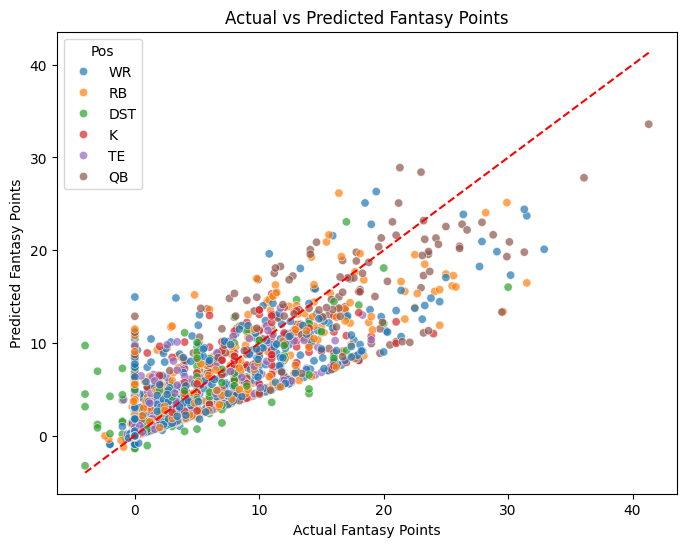

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

# preserve the Pos of the players
pos_test = stats_long.loc[X_test.index, 'Pos']

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, hue=pos_test, palette="tab10", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Fantasy Points")
plt.ylabel("Predicted Fantasy Points")
plt.title("Actual vs Predicted Fantasy Points")
plt.show()

#### Linear Regression residuals plot
*This visualization shows how off the model's predictions were from the actual scores*.

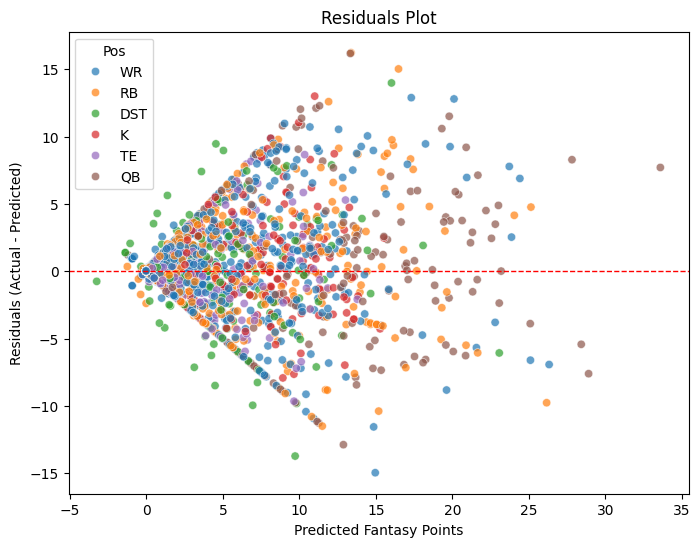

In [175]:

# calculate residuals
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, hue=pos_test, palette="tab10", alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Predicted Fantasy Points")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals Plot")
plt.show()

## Train a Random Forest model
Random Forest regression predicts a value by averaging the predictions of many decision trees, each trained on random subsets of the data and features.

In [176]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=200,  # more trees = more stable
    max_depth=10,      # prevent overfitting
    random_state=42
)

rf_model.fit(X_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### Run predictions and calculate RMSE and R^2 scores

In [177]:
y_pred_rf = rf_model.predict(X_test)

# RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Random Forest RMSE:", rmse_rf)

print("Random Forest R^2:", rf_model.score(X_test, y_test))

Random Forest RMSE: 2.432932773844665
Random Forest R^2: 0.7676285627679639


### Random Forest residuals plot
The random forest residuals plot shows more variation in the predictions than the Linear Regression model.

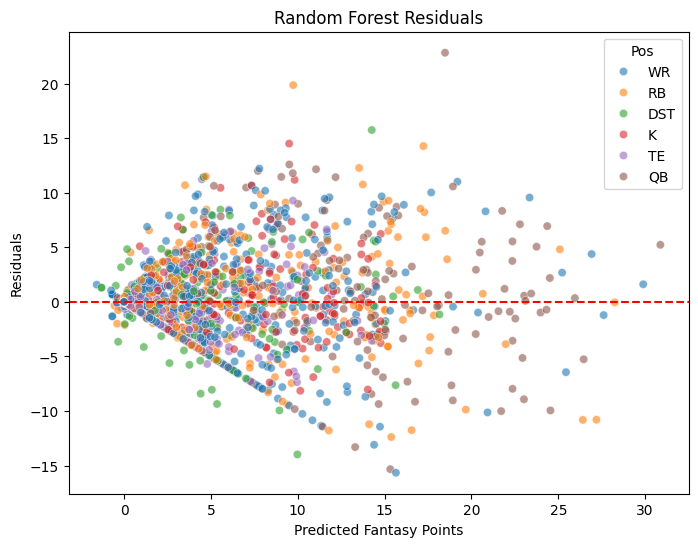

In [178]:
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred_rf, y=residuals_rf, hue=pos_test, palette="tab10", alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Fantasy Points")
plt.ylabel("Residuals")
plt.title("Random Forest Residuals")
plt.show()

## Feature enhancement
The Linear Regression model slightly outperformed the Random Forest model with a R^2 score of `.775` and an RMSE score of `2.389`. The following steps will attempt to make incremental improvements to the model for better accuracy.

#### Adding more rolling average

In [179]:
# 5-week rolling average
stats_long["rolling_avg_5"] = stats_long.groupby("Player")["fantasy_points"]\
                                .transform(lambda x: x.rolling(5, min_periods=1).mean())

# 8-week rolling average (optional)
stats_long["rolling_avg_8"] = stats_long.groupby("Player")["fantasy_points"]\
                                .transform(lambda x: x.rolling(8, min_periods=1).mean())

#### Encode `Pos` and `Team`

In [180]:
stats_encoded = pd.get_dummies(stats_long, columns=["Pos", "Team"], drop_first=True)


#### Drop the non-feature columns

In [181]:
non_features = ["Player", "season", "Week", "fantasy_points"]
X = stats_encoded.drop(columns=non_features).fillna(0)
y = stats_encoded["fantasy_points"]

#### Split training and test data on season

In [ ]:
X_train = X[stats_encoded["season"] == 2024]
y_train = y[stats_encoded["season"] == 2024]

X_test = X[stats_encoded["season"] == 2025]
y_test = y[stats_encoded["season"] == 2025]

## Create a Polynomial Features model

In [183]:
from sklearn.preprocessing import PolynomialFeatures

# use degree=2 for interactions only (no squared terms of single features)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# transform features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#### Fit the model

In [184]:
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### Make predictions and evaluate

In [185]:
from sklearn.metrics import r2_score

y_pred_poly = model_poly.predict(X_test_poly)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2 = r2_score(y_test, y_pred_poly)

print("Polynomial Regression RMSE:", rmse)
print("Polynomial Regression R^2:", r2)

Polynomial Regression RMSE: 2.3887040097747514
Polynomial Regression R^2: 0.7760004201589001


The PolynomialFeatures model proved unsuccessful. Let's try one-hot encoding the `Pos` and `Team` columns in the original Linear Regression. 

### Refit the original Linear Regression with new training set split on season

In [186]:
stats_encoded = pd.get_dummies(stats_long, columns=["Pos", "Team"], drop_first=True)

# drop non-feature columns
non_features = ["Player", "season", "Week", "fantasy_points"]
X = stats_encoded.drop(columns=non_features).fillna(0)
y = stats_encoded["fantasy_points"]

# split by season: train on 2024, test on 2025
X_train = X[stats_encoded["season"] == 2024]
y_train = y[stats_encoded["season"] == 2024]

X_test = X[stats_encoded["season"] == 2025]
y_test = y[stats_encoded["season"] == 2025]

# build a new model, fit and predict
lin_reg_enc_model = LinearRegression()
lin_reg_enc_model.fit(X_train, y_train)

y_pred = lin_reg_enc_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Linear Regression RMSE:", rmse)
print("Linear Regression R²:", r2)

Linear Regression RMSE: 1.9845540611962358
Linear Regression R²: 0.6736806840093439


### Trying a Ridge Regression

In [187]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2 = r2_score(y_test, y_pred_ridge)

print("Ridge Regression RMSE:", rmse)
print("Ridge Regression R^2:", r2)

Ridge Regression RMSE: 1.984525580513905
Ridge Regression R^2: 0.6736900500732574


### Trying a GridSearchCV

In [188]:
from sklearn.model_selection import GridSearchCV

param_grid = {"alpha": [0.01, 0.1, 1, 10, 50]}
ridge = Ridge()
grid = GridSearchCV(ridge, param_grid, scoring="r2", cv=5)
grid.fit(X_train, y_train)

print("Best alpha:", grid.best_params_)
y_pred_best = grid.predict(X_test)
print("R² with best alpha:", r2_score(y_test, y_pred_best))

Best alpha: {'alpha': 50}
R² with best alpha: 0.6740537577625437
